In [4]:
#逻辑回归
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv(r'D:\ai东西\data(3)_2.csv')

# 分离特征和目标
X = data.drop(['id', 'target'], axis=1)
y = data['target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建逻辑回归模型，设置multi_class参数为'multinomial'用于多分类（这里是三分类）
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# 训练模型
model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)

# 计算准确率和F1分数，这里F1分数使用'macro'平均方式（适合多分类且各类别同等重要的情况）
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"准确率: {accuracy}")
print(f"F1分数: {f1}")

准确率: 0.8433833333333334
F1分数: 0.3959259257547232


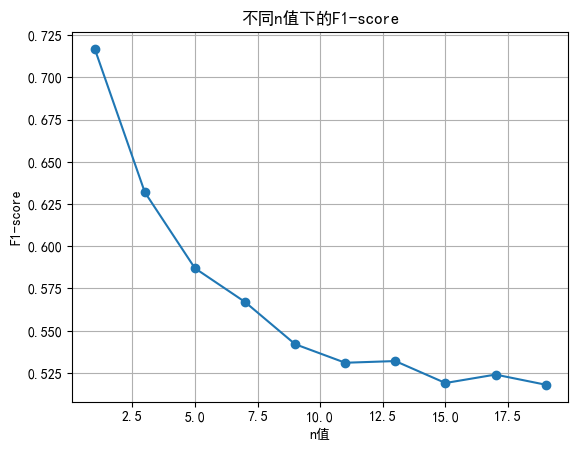

In [22]:
#knn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_csv(r'D:\ai东西\data(3)_2.csv')

# 分离特征和目标
X = data.drop(['id', 'target'], axis=1)
y = data['target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 用于存储不同n值对应的F1分数
f1_scores = []
# 循环让n_neighbors从1遍历到20,步长为2
for n in range(1, 21, 2):
    # 创建KNN模型，设置不同的n_neighbors值
    model = KNeighborsClassifier(n_neighbors=n)
    # 训练模型
    model.fit(X_train_scaled, y_train)
    # 在测试集上进行预测
    y_pred = model.predict(X_test_scaled)
    # 计算F1分数
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)

# 可视化部分
plt.plot(range(1, 21), f1_scores, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison for Different n_neighbors in KNN')
plt.xticks(range(1, 21))
plt.show()

准确率: 0.8922
F1分数: 0.6182696924558057


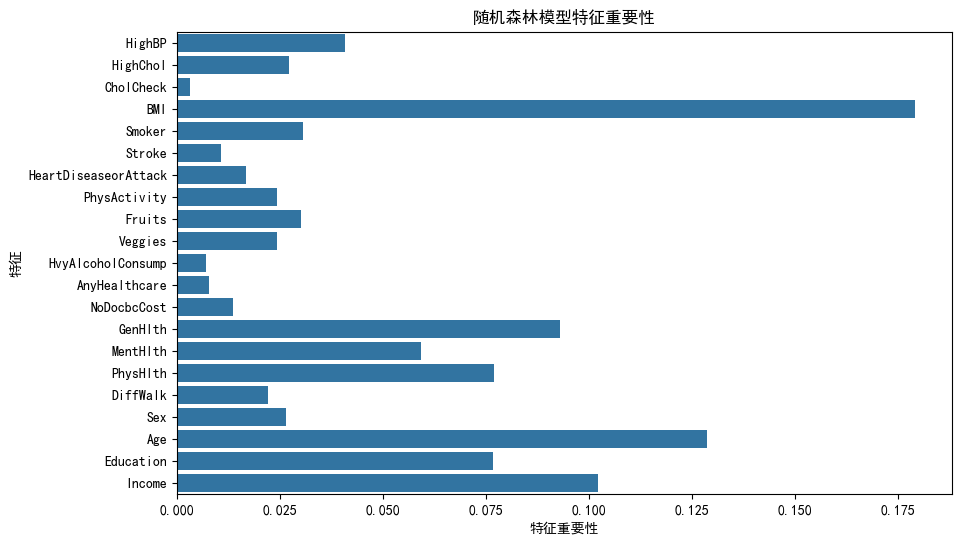

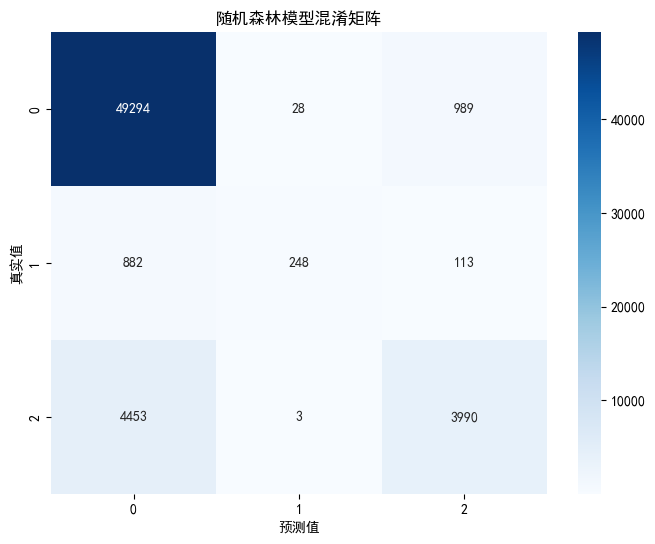

In [25]:
#随机森林
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 导入可视化相关库
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体为黑体，以解决中文显示问题（如果需要在图表中显示中文）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv(r'D:\ai东西\data(3)_2.csv')

# 分离特征和目标
X = data.drop(['id', 'target'], axis=1)
y = data['target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率和F1分数
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"准确率: {accuracy}")
print(f"F1分数: {f1}")

# 可视化部分

# 1. 特征重要性可视化
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('特征重要性')
plt.ylabel('特征')
plt.title('随机森林模型特征重要性')
plt.show()

# 2. 混淆矩阵可视化
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.title('随机森林模型混淆矩阵')
plt.show()

In [28]:
#XGboost
import xgboost as XGBoostClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_csv(r'D:\ai东西\data(3)_2.csv')

# 分离特征和目标
X = data.drop(['id', 'target'], axis=1)
y = data['target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建XGBoost模型
model = XGBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 训练模型
model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)

# 计算准确率和F1分数
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"准确率: {accuracy}")
print(f"F1分数: {f1}")


print(f"准确率: 0.8466083407402039")
print(f"F1分数: 0.3792773988164028")



准确率: 0.8466083407402039
F1分数: 0.3792773988164028


In [30]:
#Adaboosting
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv(r'D:\ai东西\data(3)_2.csv')

# 分离特征和目标
X = data.drop(['id', 'target'], axis=1)
y = data['target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建Adaboosting模型
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率和F1分数
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"准确率: {accuracy}")
print(f"F1分数: {f1}")

准确率: 0.8461333333333333
F1分数: 0.40931948171018967


In [36]:
#GBDT
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv(r'D:\ai东西\data(3)_2.csv')

# 分离特征和目标
X = data.drop(['id', 'target'], axis=1)
y = data['target']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 数据标准化（根据实际情况决定是否需要）
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 创建GBDT模型
model = GradientBoostingClassifier(n_estimators = 100, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率和F1分数
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"准确率: {accuracy}")
print(f"F1分数: {f1}")

# print(f"准确率: 0.8477")
# print(f"F1分数: 0.485462311655")

准确率: 0.8477
F1分数: 0.485462311655
